## Import libraries required

In [2]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils.io_utils import HDF5Matrix


%matplotlib inline

/home/megha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the data in HDF5 matrix format

### Training data

Q. How do you test whether the current dataset is loaded? 

A: Print the size to test whether the right dataset is loaded

In [3]:
base_path = os.path.join('..', 'data')
train_h5_path = os.path.join(base_path, 'food_c101_n10099_r32x32x3.h5')


In [4]:
X_train = HDF5Matrix(train_h5_path, 'images')[:]
y_train = HDF5Matrix(train_h5_path, 'category')[:]
y_train_cat = np.argmax(y_train,-1)
print('In Data',X_train.shape,'=>', y_train.shape, '=>', y_train_cat.shape)

In Data (10099, 32, 32, 3) => (10099, 101) => (10099,)


### Test data

In [5]:
test_h5_path = os.path.join(base_path, 'food_test_c101_n1000_r32x32x3.h5')

In [6]:
X_test = HDF5Matrix(test_h5_path, 'images')[:]
y_test = HDF5Matrix(test_h5_path, 'category')[:]
y_test_cat = np.argmax(y_test,-1)
print('In Data',X_test.shape,'=>', y_test.shape, '=>', y_test_cat.shape)

In Data (1000, 32, 32, 3) => (1000, 101) => (1000,)


### Visualize data

#### Hint: Arrange image and labels in a grid

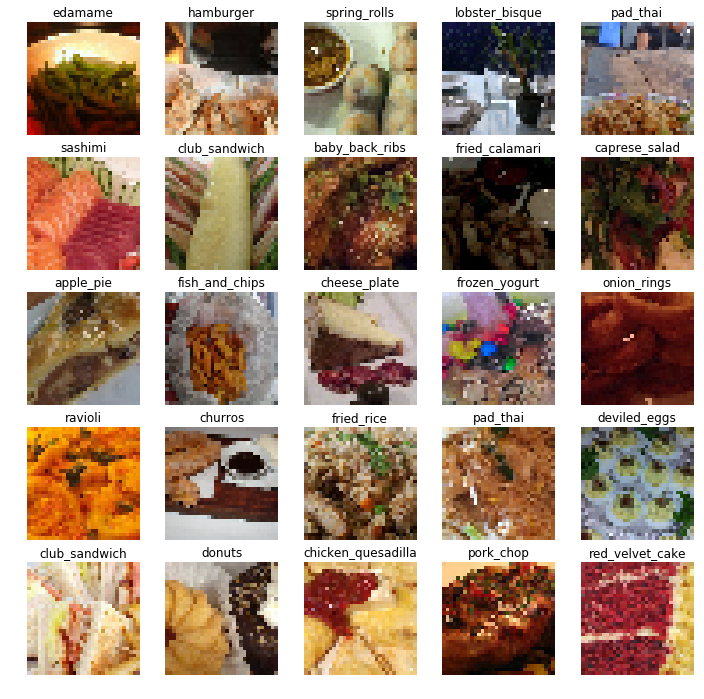

In [7]:
sample_imgs = 50
with h5py.File(train_h5_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
fig, m_ax = plt.subplots(5, 5, figsize = (12, 12))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])

## Design your model

https://keras.io/models/sequential/

#### Hint: 
- Images => 2D convolutions (`Conv2D`) 
- What should be the activation functions?


### 1. Import `keras` functions for designing the components of the model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation

### 2. Model design

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_test.shape[1]))
model.add(Activation('softmax'))
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

loss_history = []
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

### Train the model for 10 iterations

#### Hint: Can you `fit` the data to the model you designed?

In [12]:
for i in range(50):
    loss_history += [model.fit(X_train, y_train,
                               validation_data=(X_test, y_test), 
                               batch_size = 256,
                               epochs = 1, shuffle="batch")]

Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 93s 9ms/step - loss: 4.5072 - acc: 0.0361 - val_loss: 4.5031 - val_acc: 0.0350
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 85s 8ms/step - loss: 4.4889 - acc: 0.0357 - val_loss: 4.4844 - val_acc: 0.0390
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 84s 8ms/step - loss: 4.4669 - acc: 0.0408 - val_loss: 4.4686 - val_acc: 0.0420
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 84s 8ms/step - loss: 4.4457 - acc: 0.0431 - val_loss: 4.4452 - val_acc: 0.0460
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 85s 8ms/step - loss: 4.4249 - acc: 0.0415 - val_loss: 4.4406 - val_acc: 0.0440
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
 8448/10099 [===

KeyboardInterrupt: 

### Prediction time!

Test the trained model on the test data. Check the training progress

### Evaluate the prediction

Training and test accuracy

Text(0.5,1,'Accuracy')

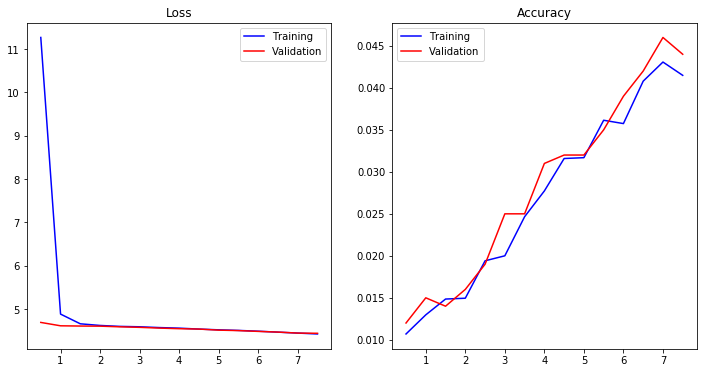

In [13]:
epich = np.cumsum(np.concatenate(
    [np.linspace(0.5, 1, len(mh.epoch)) for mh in loss_history]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
_ = ax1.plot(epich,
             np.concatenate([mh.history['loss'] for mh in loss_history]),
             'b-',
             epich, np.concatenate(
        [mh.history['val_loss'] for mh in loss_history]), 'r-')
ax1.legend(['Training', 'Validation'])
ax1.set_title('Loss')

_ = ax2.plot(epich, np.concatenate(
    [mh.history['acc'] for mh in loss_history]), 'b-',
                 epich, np.concatenate(
        [mh.history['val_acc'] for mh in loss_history]),
                 'r-')
ax2.legend(['Training', 'Validation'])
ax2.set_title('Accuracy')


### Visual results

#### Hint: Use the same code used for visualizing input data from the previous session? 

#### Import `pandas` for reading the `.csv` file 

In [16]:
import pandas as pd

#### Read the csv file

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Q:  How to check if the data is loaded?

A: Print the columns


In [30]:
annotation_file = 'FoodCategoryAnnotations.csv'
with open(annotation_file,'r') as f:
    info_df = pd.read_csv(f)
print(info_df.columns)


Index(['Category', 'Calories', 'Vegan', 'Nut allergen', 'Vegetarian',
       'Gluten-free'],
      dtype='object')


### Plot the images with information from the other file

12    254.0
Name: Calories, dtype: float64
65    55.0
Name: Calories, dtype: float64
13    115.0
Name: Calories, dtype: float64
73    261.0
Name: Calories, dtype: float64
44    168.0
Name: Calories, dtype: float64


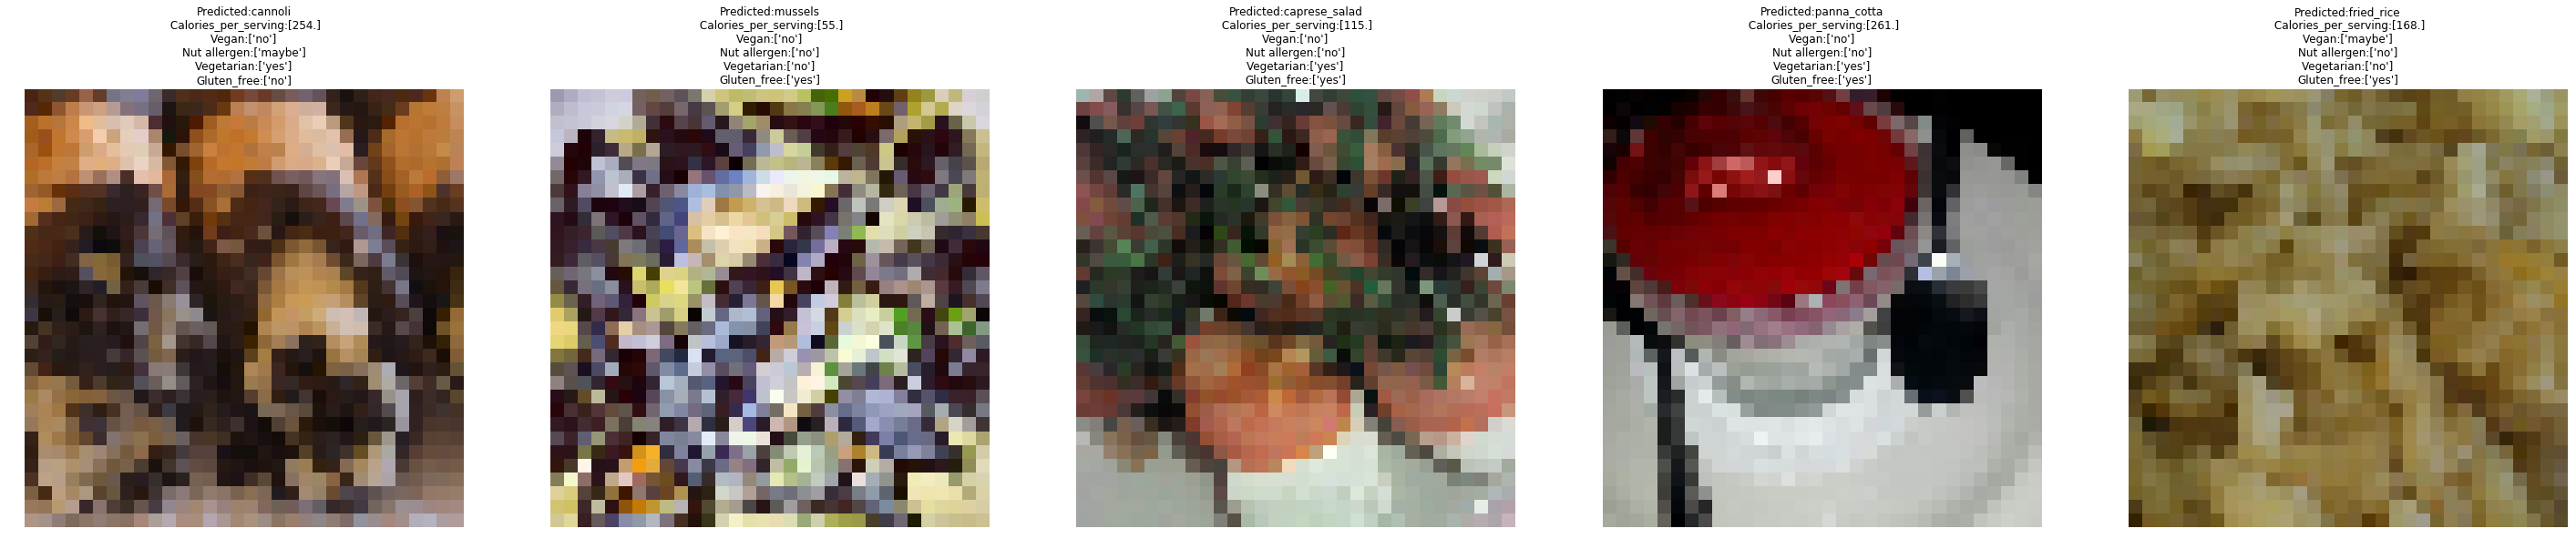

In [53]:
sample_imgs = 200
with h5py.File(test_h5_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
pred_label = model.predict(im_data)
fig, m_ax = plt.subplots(1,5, figsize = (50, 50))
#for c_ax, c_label, c_pred, c_img in zip(m_ax.flatten(), im_label, pred_label, im_data): 
m_ax_flat = m_ax.flatten()
idx = 0
for i in range(len(im_data)):
    if (label_names[np.argmax(pred_label[i])] == label_names[np.argmax(im_label[i])]):
        m_ax_flat[idx].imshow(im_data[i] if im_data[i].shape[2]==3 else im_data[i][:,:,0], cmap = 'gray')
        m_ax_flat[idx].axis('off')
        info_label = info_df.loc[info_df['Category'] == label_names[np.argmax(pred_label[i])]]
        m_ax_flat[idx].set_title('Predicted:{}\n Calories_per_serving:{}\nVegan:{}\nNut allergen:{}\nVegetarian:{}\nGluten_free:{}'.
                   format(label_names[np.argmax(pred_label[i])], str(info_label['Calories'].values),str(info_label['Vegan'].values),
                          str(info_label['Nut allergen'].values), str(info_label['Vegetarian'].values),str(info_label['Gluten-free'].values)))
        idx = idx + 1
    